# Week1 授業前課題
テキストの目的
- 基礎的なプログラミング力を確認する
- プログラミングを何らかしらの問題に対して適用してみる
- 随時調査しながら進められるようにする

【問題1】べき乗の算術演算子を使用して作成

In [30]:
"""
紙を43回折った時の厚さを計算するコード
"""
THICKNESS = 0.00008
n_folded = 43                        # 何回折るかは変数に入れる
folded_thickness = THICKNESS
folded_thickness = folded_thickness*(2**n_folded)
print("厚さ： {}メートル".format(folded_thickness))

厚さ： 703687441.77664メートル


【問題2】単位の変換

In [3]:
"""
○○万キロメートルの表記に変換
"""
print("厚さ： {:.2f}万キロメートル".format(folded_thickness/10000000))

厚さ： 70.37万キロメートル


月までの距離は38万キロメートルのため43回折ると月を超えることがわかる。

【問題3】for文を使用して作成

In [3]:
"""
for文を使用して作成
"""
THICKNESS = 0.00008

n_folded = 43

folded_thickness = THICKNESS
for i in range(n_folded):
    folded_thickness *= 2
print("厚さ： {:.2f}万キロメートル".format(folded_thickness/10000000))

厚さ： 70.37万キロメートル


注意点：

THICKNESSは定数として扱いたいので、THICKNESSを書き換えるコードは望ましくない。Pythonでは全て大文字で表した変数は、変更されることのない定数を表す慣例があり、そう人間が扱っているだけで機能的には普通の変数と同じため、変更してしまうことも可能ですが、そういったコードは分かりにくくなるため避ける。

【問題4】計算時間の比較

In [10]:
import time

THICKNESS = 0.00008

n_folded = 43

start = time.time()

folded_thickness = THICKNESS*(2**n_folded)

elapsed_time1 = time.time() - start
print("time1 : {}[ms]".format(elapsed_time1*1000))

time1 : 0.08392333984375[ms]


In [13]:
THICKNESS = 0.00008

n_folded = 43

folded_thickness = THICKNESS

start = time.time()

for i in range(n_folded):
    folded_thickness *= 2

elapsed_time2 = time.time() - start
print("time2 : {}[ms]".format(elapsed_time2*1000))

time2 : 0.10085105895996094[ms]


In [15]:
difference_time1_2 = elapsed_time2 - elapsed_time1
print("time1はtime2より {}[ms] 処理が早い \n(繰り返し数43の場合)".format(difference_time1_2*1000))

time1はtime2より 0.016927719116210938[ms] 処理が早い 
(繰り返し数43の場合)


《発展：繰り返し回数を増やす》　繰り返し数：100 に変更

In [18]:
THICKNESS = 0.00008

n_folded = 100

start = time.time()

folded_thickness = THICKNESS*(2**n_folded)

elapsed_time3 = time.time() - start
print("time3 : {}[ms]".format(elapsed_time3*1000))

time3 : 0.08511543273925781[ms]


In [19]:
THICKNESS = 0.00008

n_folded = 100

folded_thickness = THICKNESS

start = time.time()

for i in range(n_folded):
    folded_thickness *= 2

elapsed_time4 = time.time() - start
print("time4 : {}[ms]".format(elapsed_time4*1000))

time4 : 0.10514259338378906[ms]


In [20]:
difference_time3_4 = elapsed_time4 - elapsed_time3
print("time3はtime4より {}[ms] 処理が早い \n(繰り返し数100の場合)".format(difference_time3_4*1000))

time3はtime4より 0.02002716064453125[ms] 処理が早い 
(繰り返し数100の場合)


《発展：マジックコマンドを使う》

`%%timeit`と書くことでセル内のコードを複数回実行し、平均の時間を計測する機能が備わっている。

べき乗はforより早い結果であることが分かる。

In [21]:
%%timeit
THICKNESS = 0.00008
n_folded = 43
folded_thickness = THICKNESS*2**(n_folded)

321 ns ± 0.425 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [22]:
%%timeit
THICKNESS = 0.00008
n_folded = 43
folded_thickness = THICKNESS
for i in range(n_folded):
    folded_thickness *= 2

1.82 µs ± 5.14 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


【問題5】リストへの保存

43回折った後の最後の値だけを使用していましたが、グラフで可視化するためには過程の値も必要です。for文を使用したコードに、過程の値合計44個を記録するコードを加えてください。

In [24]:
t0 = 0.00008
t=[]
for i in range(44):
    ti = t0 * 2 **i
    t.append(ti)
print("要素数")
print(len(t))
print("リスト")
print(t)

要素数
44
リスト
[8e-05, 0.00016, 0.00032, 0.00064, 0.00128, 0.00256, 0.00512, 0.01024, 0.02048, 0.04096, 0.08192, 0.16384, 0.32768, 0.65536, 1.31072, 2.62144, 5.24288, 10.48576, 20.97152, 41.94304, 83.88608, 167.77216, 335.54432, 671.08864, 1342.17728, 2684.35456, 5368.70912, 10737.41824, 21474.83648, 42949.67296, 85899.34592, 171798.69184, 343597.38368, 687194.76736, 1374389.53472, 2748779.06944, 5497558.13888, 10995116.27776, 21990232.55552, 43980465.11104, 87960930.22208, 175921860.44416, 351843720.88832, 703687441.77664]


【問題6】折れ線グラフの表示

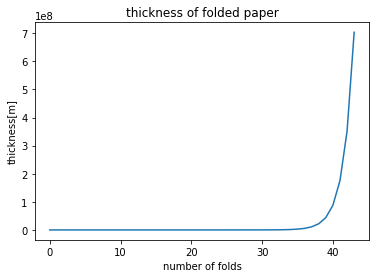

In [60]:
"""
グラフを表示する。タイトルと軸ラベル名付き。
"""
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("thickness of folded paper")
plt.xlabel("number of folds")
plt.ylabel("thickness[m]")
plt.plot(t) 
plt.show()

【問題7】グラフのカスタマイズ

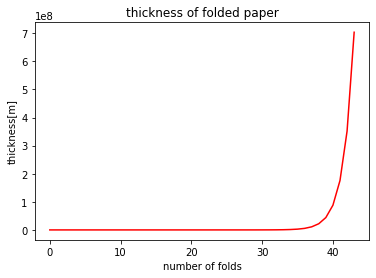

In [61]:
"""
赤い折れ線グラフを表示する。
"""
plt.title("thickness of folded paper")
plt.xlabel("number of folds")
plt.ylabel("thickness[m]")
plt.plot(t, color='red')
plt.show()

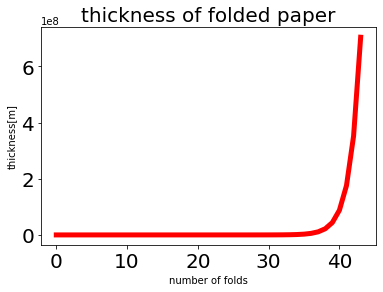

In [66]:
"""
赤い折れ線グラフを表示する。
"""
plt.title("thickness of folded paper",{"fontsize":20})
plt.xlabel("number of folds")
plt.ylabel("thickness[m]")
plt.tick_params(labelsize=20)
plt.plot(t, color='red',linestyle="solid",linewidth=5)
plt.show()

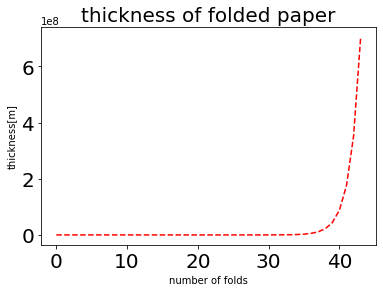

In [70]:
"""
赤い折れ線グラフを表示する。
"""
plt.title("thickness of folded paper",{"fontsize":20})
plt.xlabel("number of folds")
plt.ylabel("thickness[m]")
plt.tick_params(labelsize=20)
plt.plot(t, color='red',linestyle="dashed")
plt.show()